# ***TP1: Implémentation de la logique floue avec FloLib***




Réalisé par : Meriem Fattah

# **1ère Partie : Introduction théorique et installation**  







In [13]:
import floulib
import numpy as np
import skfuzzy
import matplotlib.pyplot as plt

# Définir la plage des valeurs de la variable floue Température (0 à 50°C)

In [14]:
temperature = np.linspace(0, 50)

# les fonctions d'appartenance trapézoïdales pour les différents niveaux de Température

# **Froid**

In [15]:
temperature_froid = skfuzzy.trapmf(temperature, [0, 0, 10, 20])

# Moyen

In [16]:
temperature_moyen = skfuzzy.trapmf(temperature, [15, 20, 30, 35])

# Chaud

In [17]:
temperature_chaud = skfuzzy.trapmf(temperature, [30, 40, 50, 50])

# Visualisation

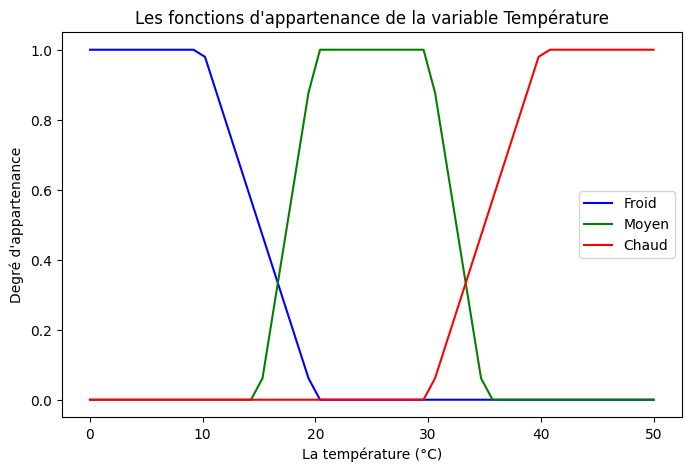

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(temperature, temperature_froid, 'b', label='Froid')
plt.plot(temperature, temperature_moyen, 'g', label='Moyen')
plt.plot(temperature, temperature_chaud, 'r', label='Chaud')
plt.title("Les fonctions d'appartenance de la variable Température")
plt.xlabel("La température (°C)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.show()

# **2ème Partie : Système flou pour le contrôle de température**  


In [19]:
import numpy as np
import skfuzzy
from skfuzzy import control as ctrl

In [20]:
temperature = ctrl.Antecedent(np.arange(0, 50), 'Température')
chauffage = ctrl.Consequent(np.arange(0, 100), 'Chauffage')

In [21]:
temperature['Froid'] = skfuzzy.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = skfuzzy.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = skfuzzy.trapmf(temperature.universe, [30, 40, 50, 50])

In [22]:
chauffage['Faible'] = skfuzzy.trapmf(chauffage.universe, [0, 0, 20, 40])
chauffage['Moyenne'] = skfuzzy.trapmf(chauffage.universe, [30, 50, 60, 80])
chauffage['Forte'] = skfuzzy.trapmf(chauffage.universe, [70, 90, 100, 100])

 # Si Froid, alors Forte

In [23]:
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])

  # Si Moyen, alors Moyenne

In [24]:
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])

# Si Chaud, alors Faible

In [25]:
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])

In [26]:
chauffage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
chauffage_system = ctrl.ControlSystemSimulation(chauffage_ctrl)

# Simulation avec Température à 25 °C

In [27]:
chauffage_system.input['Température'] = 25
chauffage_system.compute()

# Afficher le résultat

In [28]:
print(f"Puissance du chauffage : {chauffage_system.output['Chauffage']:.2f}%")

Puissance du chauffage : 55.00%


# **3ème Partie : Exploitation avancée de la bibliothèque FloLib**  




In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


#  Création des variables d'entrée et de sortie


In [30]:
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'Distance')
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'Visibilité')
vitesse = ctrl.Consequent(np.arange(0, 121, 1), 'Vitesse')

#  Définition des fonctions d'appartenance pour chaque variable


# Distance


In [31]:
distance['Proche'] = fuzz.trapmf(distance.universe, [0, 0, 20, 35])
distance['Moyenne'] = fuzz.trapmf(distance.universe, [30, 45, 55, 70])
distance['Éloignée'] = fuzz.trapmf(distance.universe, [65, 80, 100, 100])

# Visibilité


In [32]:
visibilite['Très_Faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 15, 25])
visibilite['Faible'] = fuzz.trapmf(visibilite.universe, [20, 30, 40, 50])
visibilite['Bonne'] = fuzz.trapmf(visibilite.universe, [45, 60, 75, 85])
visibilite['Excellente'] = fuzz.trapmf(visibilite.universe, [80, 90, 100, 100])

# Vitesse


In [33]:
vitesse['Très_Lente'] = fuzz.trapmf(vitesse.universe, [0, 0, 20, 30])
vitesse['Lente'] = fuzz.trapmf(vitesse.universe, [25, 35, 45, 55])
vitesse['Moyenne'] = fuzz.trapmf(vitesse.universe, [50, 60, 70, 80])
vitesse['Rapide'] = fuzz.trapmf(vitesse.universe, [75, 85, 95, 105])
vitesse['Très_Rapide'] = fuzz.trapmf(vitesse.universe, [100, 110, 120, 120])

#  Définition des règles floues


In [34]:
rules = [
    # Règles pour distance proche
    ctrl.Rule(distance['Proche'] & visibilite['Très_Faible'], vitesse['Très_Lente']),
    ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Très_Lente']),
    ctrl.Rule(distance['Proche'] & visibilite['Bonne'], vitesse['Lente']),
    ctrl.Rule(distance['Proche'] & visibilite['Excellente'], vitesse['Lente']),

    # Règles pour distance moyenne
    ctrl.Rule(distance['Moyenne'] & visibilite['Très_Faible'], vitesse['Lente']),
    ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente']),
    ctrl.Rule(distance['Moyenne'] & visibilite['Bonne'], vitesse['Moyenne']),
    ctrl.Rule(distance['Moyenne'] & visibilite['Excellente'], vitesse['Rapide']),

    # Règles pour distance éloignée
    ctrl.Rule(distance['Éloignée'] & visibilite['Très_Faible'], vitesse['Lente']),
    ctrl.Rule(distance['Éloignée'] & visibilite['Faible'], vitesse['Moyenne']),
    ctrl.Rule(distance['Éloignée'] & visibilite['Bonne'], vitesse['Rapide']),
    ctrl.Rule(distance['Éloignée'] & visibilite['Excellente'], vitesse['Très_Rapide']),

    # Règle de prudence pour distance moyenne et faible visibilité
    ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente']),

    # Règle de sécurité pour très faible visibilité
    ctrl.Rule(visibilite['Très_Faible'], vitesse['Très_Lente'])
]

# Création du système de contrôle


In [35]:
vitesse_ctrl = ctrl.ControlSystem(rules)
vitesse_simulation = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Fonction pour tester des scénarios


In [37]:
def tester_scenario(distance_value, visibilite_value):
    vitesse_simulation.input['Distance'] = distance_value
    vitesse_simulation.input['Visibilité'] = visibilite_value
    vitesse_simulation.compute()
    vitesse_recommandee = vitesse_simulation.output['Vitesse']
    print(f"\nScénario:")
    print(f"Distance: {distance_value}m")
    print(f"Visibilité: {visibilite_value}%")
    print(f"Vitesse recommandée: {vitesse_recommandee:.2f} km/h")
    return vitesse_recommandee

# Visualisation des fonctions d'appartenance


<ipython-input-39-00c7d7acdf8e>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(312)
<ipython-input-39-00c7d7acdf8e>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(313)


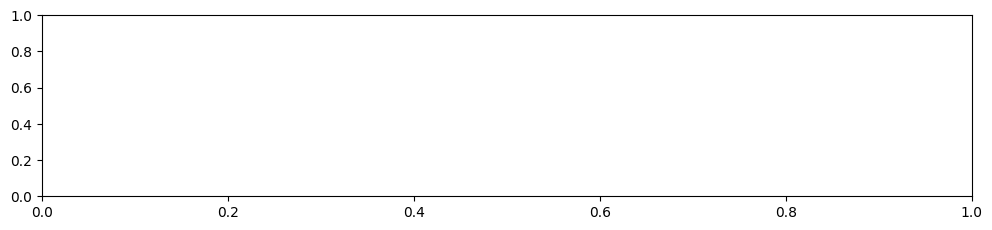

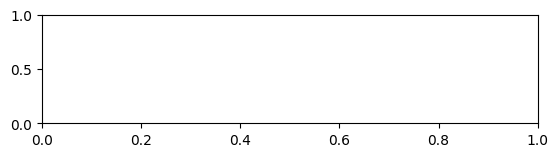

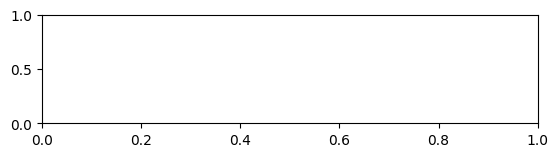

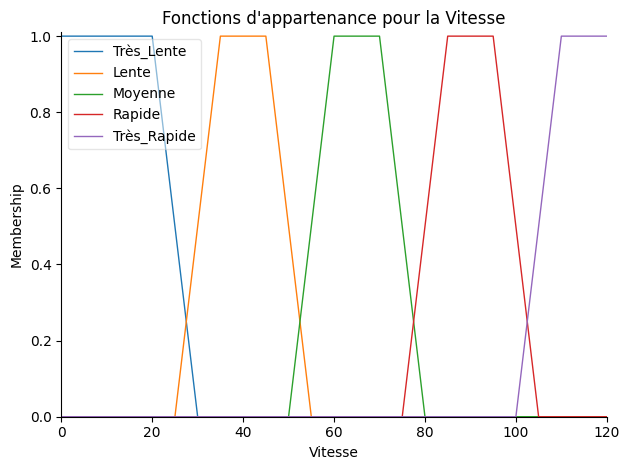

In [39]:
plt.figure(figsize=(12, 8))

plt.subplot(311)
distance.view()
plt.title("Fonctions d'appartenance pour la Distance")

plt.subplot(312)
visibilite.view()
plt.title("Fonctions d'appartenance pour la Visibilité")

plt.subplot(313)
vitesse.view()
plt.title("Fonctions d'appartenance pour la Vitesse")

plt.tight_layout()
plt.show()



# Test des différents scénarios


In [40]:
print("\n=== Tests des scénarios ===")

# Test 1: Distance proche, très faible visibilité
tester_scenario(10, 10)

# Test 2: Distance moyenne, bonne visibilité
tester_scenario(50, 70)

# Test 3: Distance éloignée, excellente visibilité
tester_scenario(90, 95)

# Test 4: Distance moyenne, faible visibilité
tester_scenario(50, 35)

# Test 5: Distance éloignée, très faible visibilité
tester_scenario(85, 10)


=== Tests des scénarios ===

Scénario:
Distance: 10m
Visibilité: 10%
Vitesse recommandée: 12.67 km/h

Scénario:
Distance: 50m
Visibilité: 70%
Vitesse recommandée: 65.00 km/h

Scénario:
Distance: 90m
Visibilité: 95%
Vitesse recommandée: 112.22 km/h

Scénario:
Distance: 50m
Visibilité: 35%
Vitesse recommandée: 40.00 km/h

Scénario:
Distance: 85m
Visibilité: 10%
Vitesse recommandée: 24.78 km/h


24.778528528528522

# Création d'une surface de contrôle 3D


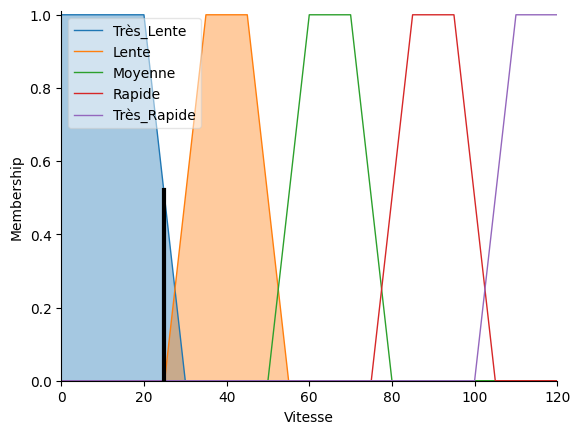

In [41]:
vitesse.view(sim=vitesse_simulation)
plt.show()